# A Comparison between different Euclid GCD and Binary GCD algorithms

# The Intuition Behind the Binary GCD Algorithm:
- $Since,$  $d = c.gcd(a, b)$ $Given$ $that:$ $d = gcd(ac, bc)$
- $This\ intuitively\ shows\ you\ that\ if\ two\ numbers\ share\ a\ common\ divisor,\ then\ the\ difference\ between\ the\ two\ numbers\ also\ shares\ the\ same\ divisor$
```
# if u and v are even, then
    return 2*binaryGCD_rec(u >> 1, v >> 1)  # 2*gcd(u/2, v/2) (From 1)
```

- $Since,$  $gcd(a, bc) = gcd(a, b)$ $if$ $gcd(a, c) = 1$ 
- $Since$ $gcd(odd\ number, 2) = 1$
- $This\ intuitively\ shows\ you\ that\ if\ one\ of\ the\ two\ numbers\ is\ even\ then,\ we\ can\ divide\ it\ by\ 2\ and\ its\ gcd\ won't\ change$
```
# if either u or v is even, then
    return binaryGCD_rec(u >> 1, v)  # 2*gcd(u/2, v) (From 2)
    return binaryGCD_rec(u, v >> 1)  # 2*gcd(u, v/2) (From 2)
```


- $Since,$  $gcd(a, b) = gcd(a−b, b)$ $assuming$ $a > b$
- $This\ intuitively\ shows\ you\ that\ we\ can\ reduce\ numbers\ using\ their\ difference$
```
# if either u and v are odd, then
# their difference is even, then
    return binaryGCD_rec((u-v) >> 1, v)  # 2*gcd((u-v)/2, v) (From 2, 3)
# or
    return binaryGCD_rec((v-u) >> 1, u)  # 2*gcd((v-u)/2, u) (From 2, 3)
```
Here, are the proofs of some of the used theroms and corollaries,

# I. Prove that: if d = gcd(ac, bc), then d = c.gcd(a, b)

- $If$ $d = gcd(ac, bc)$
- $Then,$ $d|ac$ and $d|bc$
- $Then,$ $ac = dk_1$ and $bc = dk_2$
- $Then,$ $a = (d/c)k_1$ and $b = (d/c)k_2$
- $Then,$ $(d/c)|a$ and $(d/c)|b$
- $Then,$ $(d/c) = gcd(a, b)$
- $Then,$ $d = c.gcd(a, b)$


# II. Prove that: if gcd(a, c) = 1 then, gcd(a, bc) = gcd(a, b)

- $Let,$ $d = gcd(a, bc)$
- $Then,$ $d|a$ and $d|bc$
- $Assume,$ $gcd(a, c) = 1$
- $Then,$ $d$ ~~|~~ $c$ 
- $But,$ $d|bc$
- $Then,$ $d|b$
- $Then,$ $d|gcd(a, b)$
- $Assume,$ $e = gcd(a, b)$
- $By\ definition,$ $e|a$ and $e|b$
- $Then,$ $e|bc$ $Theorem$
- $Then,$ $e|d$
- $But,$ $d|e$
- $Then,$ $d = e$
- $Then,$ $gcd(a, b) = gcd(a, bc)$


# III. Prove that: gcd(a, b) = gcd(a−b, b) assuming a > b

We should prove it in the two directions:
- $Every\ common\ divisor\ of\ a\ and\ b\ is\ also\ a\ common\ divisor\ of\ a − b\ and\ b$
  - $If$ $a = dp$ and $b = dq$
  - $Then$ $a − b = d(p − q)$
- $Every\ common\ divisor\ of\ a − b\ and\ b \ is\ also\ a\ common\ divisor\ of\ a\ and\ b $
  - $If$ $a − b = dp$ and $b = dq$
  - $Then$ $a = d(p + q)$
- $Therefore,$  $gcd(a, b) = gcd(a − b, b)$

# Implemnatation

Comparison between different implemnatations of Euclid GCD and Binary GCD for
  randomly generated integers.


In [8]:
# Functions Implementations 
from numba import jit

@jit(nopython=True)
def euclidGCD(a, b):
    assert a >= b and b >= 0 
    return euclidGCD(b, a % b) if b > 0 else a


@jit(nopython=True)
def extendedEuclidGCD_utility(a, b):  # returns gcd (a, b), x, y: gcd (a, b) = ax+by
    assert a >= b and b >= 0
    
    if b == 0:
        d, x, y = a, 1, 0
    else:
        (d, p, q) = extendedEuclidGCD_utility(b, a % b)
        x = q
        y = p - q * (a // b)
    assert a % d == 0 and b % d == 0
    assert d == a * x + b * y
    return (d, x, y)
def extendedEuclidGCD(a, b):
    return extendedEuclidGCD_utility(a, b)[0]

@jit(nopython=True)
def binaryGCD_rec(u, v):
    if u == v:
        return u
    elif u == 0:
        return v
    elif v == 0:
        return u
    # u is even
    elif u & 1 == 0:
        # v is even
        if v & 1 == 0:
            return 2*binaryGCD_rec(u >> 1, v >> 1)  # 2*gcd(u/2, v/2) (From 1)
        # v is odd
        else:
            return binaryGCD_rec(u >> 1, v)  # 2*gcd(u/2, v) (From 2)
    # u is odd
    elif u & 1 != 0:
        # v is even
        if v & 1 == 0:
            return binaryGCD_rec(u, v >> 1)  # 2*gcd(u, v/2) (From 2)
        # v is odd and u is greater than v
        elif u > v and v & 1 != 0:
            return binaryGCD_rec((u-v) >> 1, v)  # 2*gcd((u-v)/2, v) (From 2, 3)
        # v is odd and u is smaller than v
        else:
            return binaryGCD_rec((v-u) >> 1, u)  # 2*gcd((v-u)/2, u) (From 2, 3)

@jit(nopython=True)
def binaryGCD_nonRec(u, v):
    # if u is 0, return v
    if u == 0:
        return v
    # if v is 0, return u
    if v == 0:
        return u
    # make sure u is positive
    u = abs(u)
    # make sure v is positive
    v = abs(v)

    # temporary varible to store
    # the common factors of 2
    k = 1

    # run this loop until u or v becomes odd
    while u & 1 == 0 and v & 1 == 0:
        k <<= 1
        u >>= 1
        v >>= 1

    # remove all the remaining powers of 2
    while u & 1 == 0:
        u >>= 1

    # remove all the remaining powers of 2
    while v & 1 == 0:
        v >>= 1

    #  run the while loop
    while v != 0:
        # check if u > v
        if u > v:
            # swap the values
            u, v = v, u
        v = v - u
    # return value
    return u*k


In [9]:
# run the function to let numba compile it
euclidGCD(7, 5)
extendedEuclidGCD(7, 5)
binaryGCD_rec(7, 5)
binaryGCD_nonRec(7, 5)


1

In [10]:
import time
import random

MIN_NUM_BITS = 8
MAX_NUM_BITS = 64
# Utility Functions
def getProperRandomNum(maxNoBits):
    a = random.getrandbits(maxNoBits)
    b = random.getrandbits(maxNoBits+1)
    if a < b:
        a, b = b, a  # swap the values
    if a == 0 or b ==0:
        a = 2 ** maxNoBits
        b = a >> 1
    # print(a, b)
    return(a, b)

def calcTimeOfAlgo(algo,minSize, maxSize):
    runTime = []
    for i in range(minSize-1, maxSize):
        a, b = getProperRandomNum(i)
        start=time.time()
        algo(a, b)
        end=time.time()
        runTime.append(end - start)
    return(runTime)
    

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use ggplot style for more sophisticated visuals

# Plot Functions

# plot all the functions on the same graph
def plotOnSameGraph(x):
    # this is the call to matplotlib that allows dynamic plotting
    plt.ion()
    fig = plt.figure(figsize=(13,6))
    ax = fig.add_subplot(111)
    ax.plot(x,calcTimeOfAlgo(euclidGCD,x[0], x[-1]),'-o',alpha=0.8)      
    ax.plot(x,calcTimeOfAlgo(extendedEuclidGCD,x[0], x[-1]),'-o',alpha=0.8)      
    ax.plot(x,calcTimeOfAlgo(binaryGCD_rec,x[0], x[-1]),'-o',alpha=0.8)      
    ax.plot(x,calcTimeOfAlgo(binaryGCD_nonRec,x[0], x[-1]),'-o',alpha=0.8)      
    ax.legend(['euclidGCD', 'extendedEuclidGCD', 'binaryGCD_rec','binaryGCD_nonRec' ])

    plt.ylabel('Runtime (sec.)')
    plt.xlabel('Number of Binary Digits')
    plt.title('Title: {}'.format("GCD Algorithms Comparison"))
    plt.show()

# plot all the functions sided
def plotSidedGraph(x):
    # this is the call to matplotlib that allows dynamic plotting
    plt.ion()
    fig = plt.figure(figsize=(13,6))

    ax = fig.add_subplot(221)
    color = random.random(), random.random(), random.random()
    ax.plot(x,calcTimeOfAlgo(euclidGCD,x[0], x[-1]),'-o',alpha=0.8, color=color)       
    ax.legend(['euclidGCD'])
    

    bx = fig.add_subplot(222)
    color = random.random(), random.random(), random.random()
    bx.plot(x,calcTimeOfAlgo(extendedEuclidGCD,x[0], x[-1]),'-o',alpha=0.8, color=color)     
    bx.legend(['extendedEuclidGCD'])

    cx = fig.add_subplot(223)
    color = random.random(), random.random(), random.random()
    cx.plot(x,calcTimeOfAlgo(binaryGCD_rec,x[0], x[-1]),'-o',alpha=0.8, color=color)     
    cx.legend(['binaryGCD_rec'])

    dx = fig.add_subplot(224)
    color = random.random(), random.random(), random.random()
    dx.plot(x,calcTimeOfAlgo(binaryGCD_nonRec,x[0], x[-1]),'-o',alpha=0.8, color=color)      
    dx.legend(['binaryGCD_nonRec'])


    plt.ylabel('Runtime (sec.)')
    plt.xlabel('Number of Binary Digits')
    plt.show()

# plot solo graphs
def plotter(x_vec,y1_data,identifier=''):
    # this is the call to matplotlib that allows dynamic plotting
    plt.ion()
    fig = plt.figure(figsize=(13,6))
    ax = fig.add_subplot(111)
    color = random.random(), random.random(), random.random()

    ax.plot(x_vec,y1_data,'-o',alpha=0.8,  color=color)        
    #update plot label/title
    plt.ylabel('Runtime (sec.)')
    plt.xlabel('Number of Binary Digits')
    plt.title('Title: {}'.format(identifier))
    plt.show()

In [12]:
import pandas as pd
#Display Tables Function
def showTables():
        # solo Graphs
        size = list(range(MIN_NUM_BITS, MAX_NUM_BITS))
        
        # dictionary of lists
        dict = {'Number of Binary digits': list(range(MIN_NUM_BITS, MAX_NUM_BITS)), 'euclidGCD': calcTimeOfAlgo(euclidGCD, size[0], size[-1]),
                'extendedEuclidGCD': calcTimeOfAlgo(extendedEuclidGCD, size[0], size[-1]), 'binaryGCD_rec': calcTimeOfAlgo(binaryGCD_rec, size[0], size[-1]), 'binaryGCD_nonRec': calcTimeOfAlgo(binaryGCD_nonRec, size[0], size[-1])}

        df = pd.DataFrame(dict)
        df.set_index(keys='Number of Binary digits', inplace=True)
        display(df)


# Results

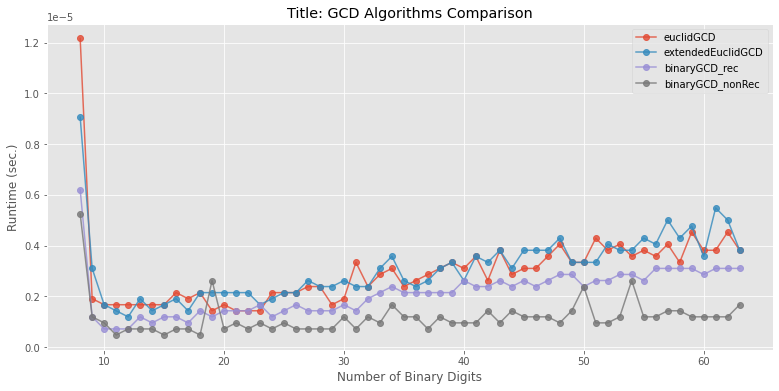

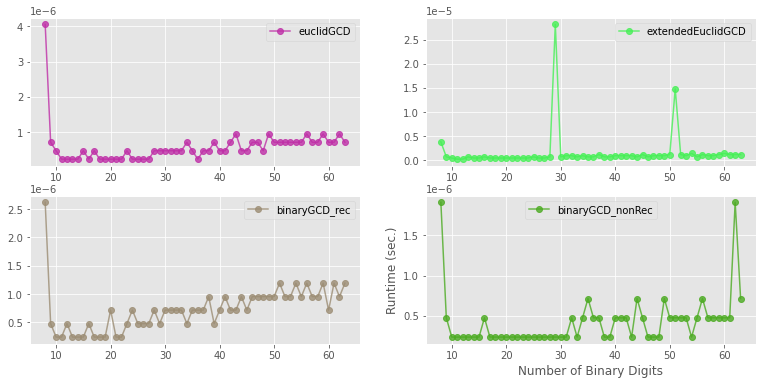

In [13]:
plotOnSameGraph(list(range(MIN_NUM_BITS, MAX_NUM_BITS)))
plotSidedGraph(list(range(MIN_NUM_BITS, MAX_NUM_BITS)))


### we can see that **binaryGCD_nonRec** is always **faster** than **binaryGCD_nonRec**

### we can see that **binaryGCD** is always **faster** than **extendedEuclidGCD**

In [14]:
showTables()

,euclidGCD,extendedEuclidGCD,binaryGCD_rec,binaryGCD_nonRec
Number of Binary digits,,,,
8,4.291534e-06,1.907349e-06,1.192093e-06,7.152557e-07
9,4.768372e-07,7.152557e-07,2.384186e-07,2.384186e-07
10,7.152557e-07,4.768372e-07,2.384186e-07,4.768372e-07
11,2.384186e-07,2.384186e-07,4.768372e-07,4.768372e-07
12,7.152557e-07,2.384186e-07,4.768372e-07,2.384186e-07
13,2.384186e-07,4.768372e-07,2.384186e-07,2.384186e-07
14,4.768372e-07,4.768372e-07,2.384186e-07,2.384186e-07
15,2.384186e-07,4.768372e-07,2.384186e-07,2.384186e-07
16,2.384186e-07,2.384186e-07,2.384186e-07,4.768372e-07
